In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pandas options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

| Variable Name                 | Description                                                               |
|-------------------------------|---------------------------------------------------------------------------|
| avganncount                   | Average number of cancer cases diagnosed annually.                       |
| avgdeathsperyear              | Average number of deaths due to cancer per year.                         |
| target_deathrate              | Target death rate due to cancer.                                         |
| incidencerate                 | Incidence rate of cancer.                                                |
| medincome                     | Median income in the region.                                             |
| popest2015                    | Estimated population in 2015.                                            |
| povertypercent                | Percentage of population below the poverty line.                         |
| studypercap                   | Per capita number of cancer-related clinical trials conducted.           |
| binnedinc                     | Binned median income.                                                    |
| medianage                     | Median age in the region.                                                |
| pctprivatecoveragealone       | Percentage of population covered by private health insurance alone.      |
| pctempprivcoverage            | Percentage of population covered by employee-provided private health insurance. |
| pctpubliccoverage             | Percentage of population covered by public health insurance.             |
| pctpubliccoveragealone        | Percentage of population covered by public health insurance only.        |
| pctwhite                      | Percentage of White population.                                          |
| pctblack                      | Percentage of Black population.                                          |
| pctasian                      | Percentage of Asian population.                                          |
| pctotherrace                  | Percentage of population belonging to other races.                       |
| pctmarriedhouseholds          | Percentage of married households.                                        |
| birthrate                     | Birth rate in the region.                                                |


In [99]:
# load data
cancer_stats = pd.read_csv('data/cancer_reg_stats.csv')
regional_stats = pd.read_csv('data/cancer_avg-household-size.csv')
# join on geography
cancer_stats = cancer_stats.merge(regional_stats, on='geography', how='inner')

# these columns have many missing values
# drop pctsomecol18_24 column
cancer_stats.drop(columns=['pctsomecol18_24'], inplace=True)
# drop pctprivatecoveragealone column
cancer_stats.drop(columns=['pctprivatecoveragealone'], inplace=True)
# drop rows where pctemployed16_over is missing
cancer_stats = cancer_stats[~cancer_stats['pctemployed16_over'].isnull()]

In [100]:
statefips_dict = {
    1: "AL",  # Alabama
    2: "AK",  # Alaska
    4: "AZ",  # Arizona
    5: "AR",  # Arkansas
    6: "CA",  # California
    8: "CO",  # Colorado
    9: "CT",  # Connecticut
    10: "DE",  # Delaware
    11: "DC",  # District of Columbia
    12: "FL",  # Florida
    13: "GA",  # Georgia
    15: "HI",  # Hawaii
    16: "ID",  # Idaho
    17: "IL",  # Illinois
    18: "IN",  # Indiana
    19: "IA",  # Iowa
    20: "KS",  # Kansas
    21: "KY",  # Kentucky
    22: "LA",  # Louisiana
    23: "ME",  # Maine
    24: "MD",  # Maryland
    25: "MA",  # Massachusetts
    26: "MI",  # Michigan
    27: "MN",  # Minnesota
    28: "MS",  # Mississippi
    29: "MO",  # Missouri
    30: "MT",  # Montana
    31: "NE",  # Nebraska
    32: "NV",  # Nevada
    33: "NH",  # New Hampshire
    34: "NJ",  # New Jersey
    35: "NM",  # New Mexico
    36: "NY",  # New York
    37: "NC",  # North Carolina
    38: "ND",  # North Dakota
    39: "OH",  # Ohio
    40: "OK",  # Oklahoma
    41: "OR",  # Oregon
    42: "PA",  # Pennsylvania
    44: "RI",  # Rhode Island
    45: "SC",  # South Carolina
    46: "SD",  # South Dakota
    47: "TN",  # Tennessee
    48: "TX",  # Texas
    49: "UT",  # Utah
    50: "VT",  # Vermont
    51: "VA",  # Virginia
    53: "WA",  # Washington
    54: "WV",  # West Virginia
    55: "WI",  # Wisconsin
    56: "WY",  # Wyoming
}

In [101]:
cancer_stats.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize
count,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2.895000e+03,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000
mean,611.237720,187.461485,178.638964,447.968130,47001.894301,1.036786e+05,16.915440,157.692163,45.104387,39.598135,42.183282,51.770190,18.231710,35.032919,6.173713,34.816200,13.243592,54.152642,7.857720,64.305216,41.155302,36.313955,19.273506,83.610678,9.133871,1.260685,2.005906,51.226933,5.636896,30.265630,101.901554,2.528235
std,1442.306706,513.453780,27.464991,52.737861,12047.178175,3.362041e+05,6.425357,541.188736,44.495505,5.231846,5.276953,6.878744,8.101923,9.099730,4.557746,7.017115,5.359881,8.315064,3.451343,10.645841,9.439102,7.837938,6.116058,16.352919,14.555143,2.648290,3.568495,6.522579,2.001470,15.072375,104.545806,0.245812
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,23.100000,0.000000,0.000000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,1.000000,1.000000,1.860000
25%,75.500000,28.000000,161.300000,420.300000,38751.000000,1.165250e+04,12.150000,0.000000,37.700000,36.300000,39.100000,47.750000,12.800000,29.200000,3.100000,30.500000,9.400000,48.600000,5.500000,57.150000,34.400000,30.800000,14.900000,77.211147,0.633417,0.249003,0.296176,47.790762,4.514261,18.000000,35.000000,2.380000
50%,171.000000,61.000000,178.100000,453.549422,45132.000000,2.652100e+04,15.900000,0.000000,41.000000,39.600000,42.400000,52.400000,17.200000,34.700000,5.300000,35.300000,12.300000,54.500000,7.600000,65.000000,41.000000,36.400000,18.800000,90.028880,2.313188,0.545589,0.830184,51.673640,5.382482,29.000000,79.000000,2.500000
75%,515.000000,148.000000,195.200000,480.500000,52488.000000,6.814050e+04,20.500000,81.759464,44.000000,42.600000,45.400000,56.400000,22.700000,40.700000,8.200000,39.600000,16.100000,60.300000,9.700000,72.000000,47.600000,41.700000,23.100000,95.364834,10.658813,1.221638,2.204819,55.335684,6.493677,45.000000,133.000000,2.640000
max,38150.000000,14010.000000,293.900000,1014.200000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,72.500000,62.700000,72.500000,51.800000,54.800000,42.200000,80.100000,29.400000,92.300000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,71.703057,21.326165,56.000000,840.000000,3.970000


In [102]:
cancer_stats_reduced = cancer_stats.drop(columns=['geography', 'binnedinc']) # drop non-numeric columns
# # combine statefips and countyfips to get a unique identifier for each county
# cancer_stats_reduced['regionfips'] = cancer_stats_reduced['statefips'].astype(str) + cancer_stats_reduced['countyfips'].astype(str)
# cancer_stats_reduced['regionfips'] = cancer_stats_reduced['regionfips'].astype(int)
# cancer_stats_reduced.drop(columns=['statefips', 'countyfips'], inplace=True)
cancer_stats_reduced

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,41.7,52.5,11.5,39.5,6.9,23.2,19.6,51.9,8.0,75.1,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,53,35,2.54
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,33.7,44.5,6.1,22.4,7.5,26.0,22.7,55.9,7.8,70.2,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,53,37,2.34
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,45.8,54.2,24.0,36.6,9.5,29.0,16.0,45.9,7.0,63.7,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,53,39,2.62
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,43.4,52.7,20.2,41.2,2.5,31.6,9.3,48.3,12.1,58.4,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,53,41,2.52
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,48.9,57.8,14.9,43.0,2.0,33.4,15.0,48.2,4.8,61.6,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,53,43,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3041,1962.667684,48,146.4,453.549422,49508,29029,13.0,723.414516,32.2,31.0,33.8,45.1,2.9,17.7,9.8,27.7,21.9,68.6,4.5,80.0,52.9,24.3,9.5,94.291726,1.145104,1.386542,1.014038,43.276779,3.977583,20,51,2.35
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,48.8,51.0,20.9,27.9,8.4,32.2,15.2,51.7,4.3,78.3,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512,20,53,2.08
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,31.4,52.6,26.7,33.9,3.8,23.1,12.4,70.1,4.6,64.5,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470,20,55,2.90
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,31.2,54.8,19.7,44.5,2.5,23.0,12.8,64.8,6.4,62.0,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192,20,57,3.04


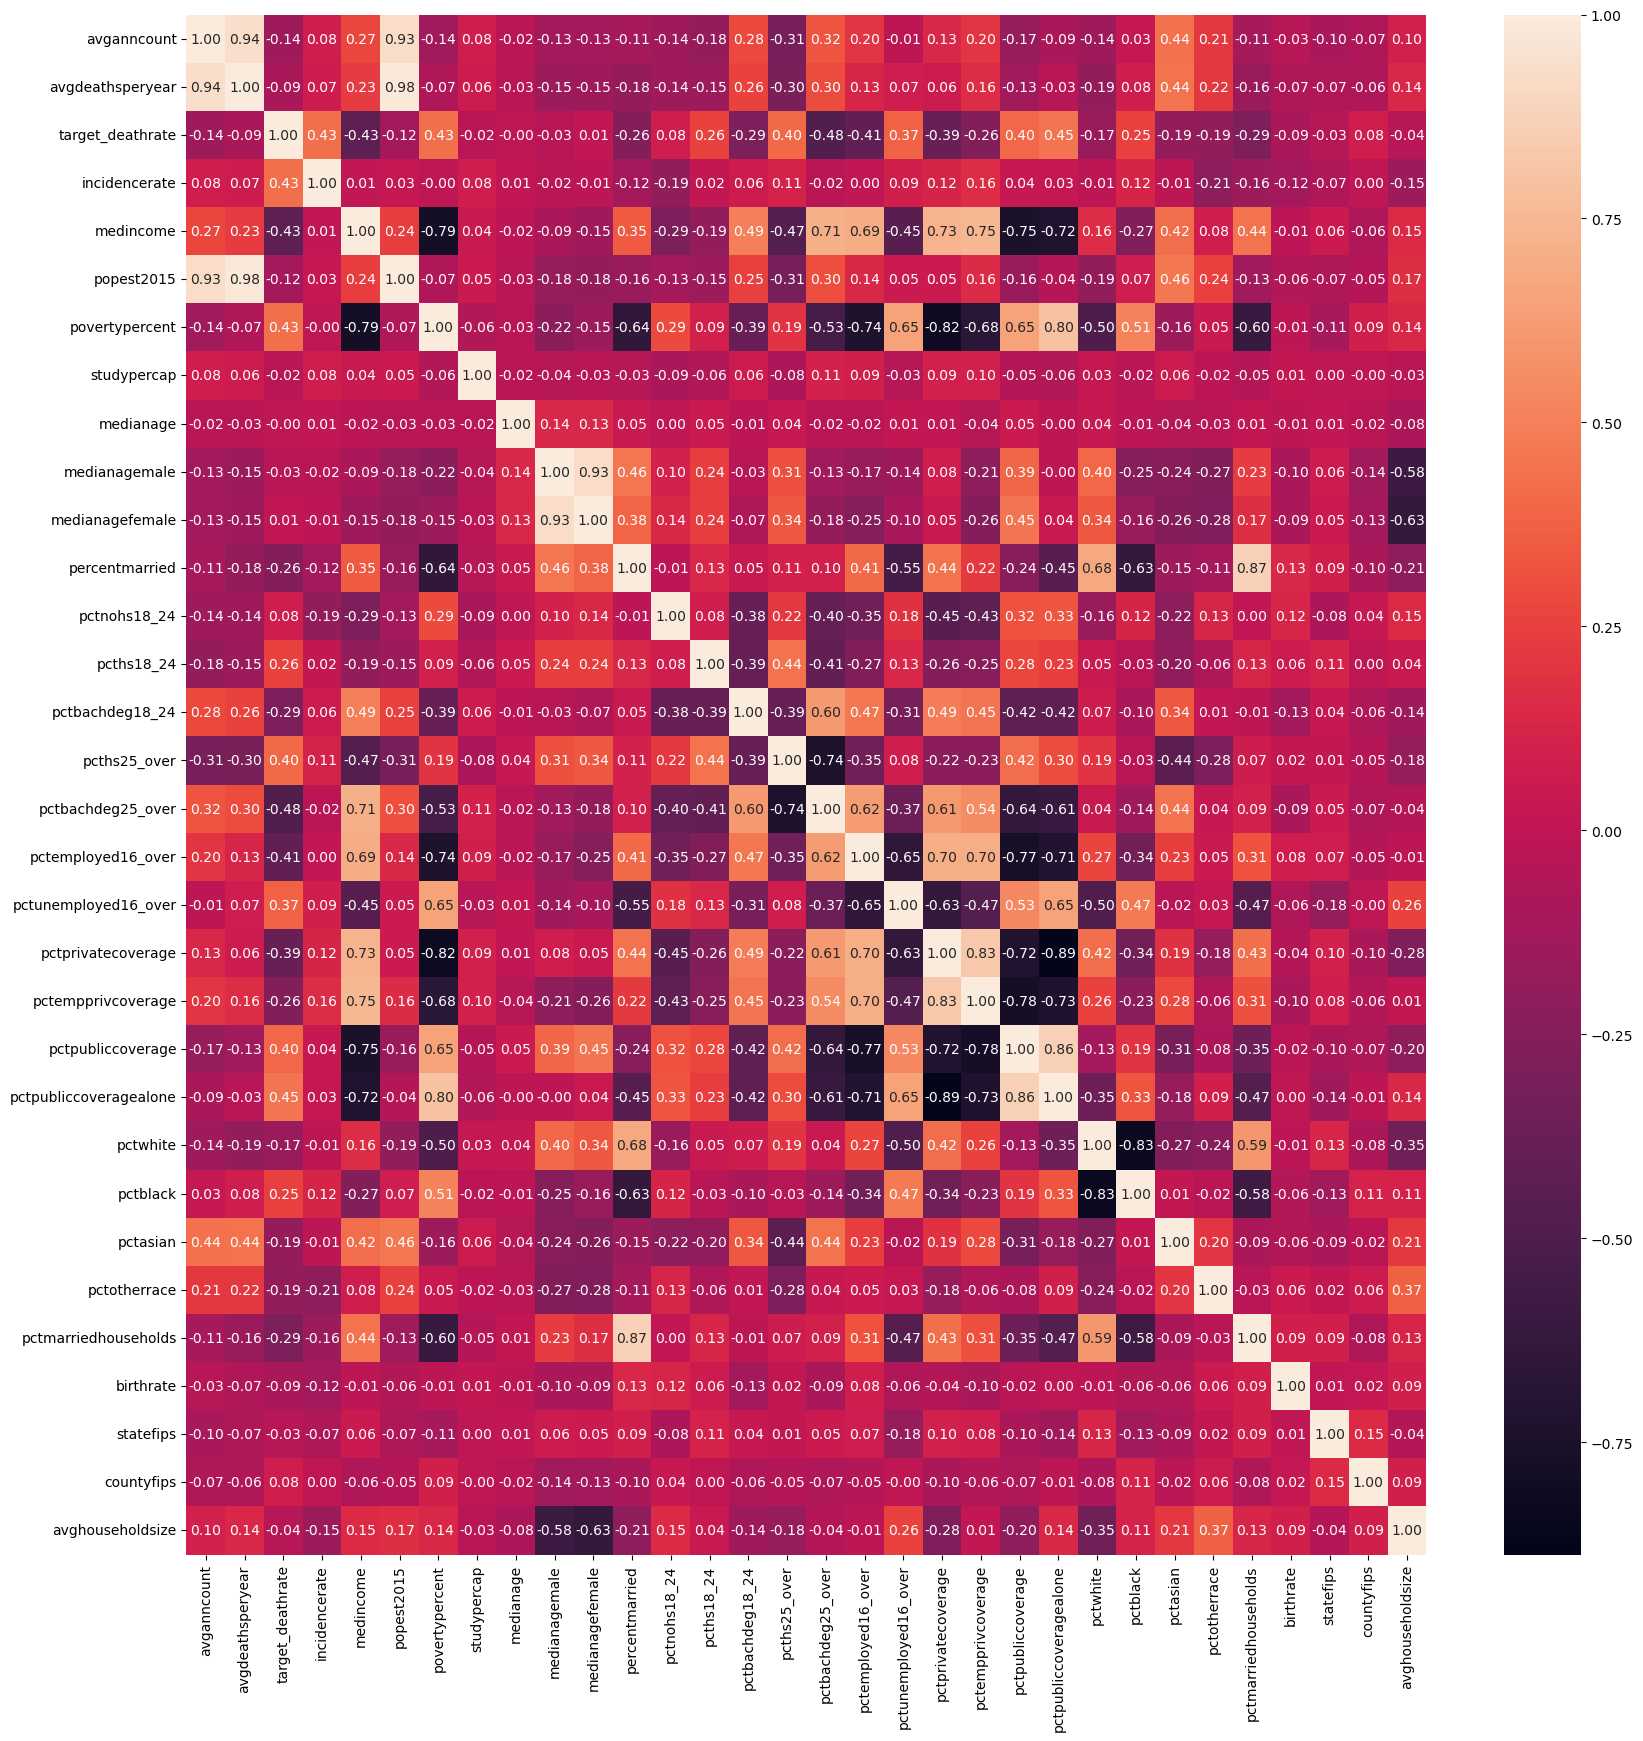

In [103]:
# correlation matrix
corr = cancer_stats_reduced.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [104]:
# we want to predict target variable 'target_deathrate'
# let's see how it is correlated with other variables
corr_target = corr['target_deathrate']
corr_target = corr_target.sort_values(ascending=False)
corr_target

target_deathrate          1.000000
pctpubliccoveragealone    0.448087
incidencerate             0.428787
povertypercent            0.425083
pcths25_over              0.403842
pctpubliccoverage         0.402141
pctunemployed16_over      0.373750
pcths18_24                0.261246
pctblack                  0.252774
pctnohs18_24              0.080009
countyfips                0.078749
medianagefemale           0.010088
medianage                -0.001208
studypercap              -0.020402
medianagemale            -0.025385
statefips                -0.033173
avghouseholdsize         -0.038687
birthrate                -0.088058
avgdeathsperyear         -0.091365
popest2015               -0.119804
avganncount              -0.144066
pctwhite                 -0.165104
pctasian                 -0.186464
pctotherrace             -0.189770
percentmarried           -0.257639
pctempprivcoverage       -0.264430
pctbachdeg18_24          -0.285941
pctmarriedhouseholds     -0.286233
pctprivatecoverage  

In [105]:
# we now create our feature matrix X and target vector y
X = cancer_stats_reduced.drop(columns=['target_deathrate', 'incidencerate', 'avganncount', 'avgdeathsperyear'])
y = cancer_stats_reduced['target_deathrate']

# split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

col_names = X.columns

# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)

# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')

Mean Squared Error: 433.6866027447603
R^2: 0.4360547976740947


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

X_X = MS(X.columns).fit_transform(X)
y_y = y
model = sm.OLS(y_y, X_X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,2.660915e+02,21.189000,12.558,0.000
medincome,3.000000e-04,0.000091,2.916,0.004
popest2015,1.539000e-07,0.000001,0.110,0.912
povertypercent,6.220000e-02,0.181000,0.344,0.731
studypercap,1.000000e-03,0.001000,1.391,0.164
medianage,-3.000000e-04,0.009000,-0.031,0.976
medianagemale,-5.261000e-01,0.235000,-2.237,0.025
medianagefemale,-6.476000e-01,0.254000,-2.552,0.011
percentmarried,1.429300e+00,0.219000,6.532,0.000
pctnohs18_24,-2.382000e-01,0.063000,-3.794,0.000


In [110]:
# create a list of all predictors with p < 0.05
significant_predictors = results.pvalues[results.pvalues < 0.05].index.tolist()
significant_predictors

['intercept',
 'medincome',
 'medianagemale',
 'medianagefemale',
 'percentmarried',
 'pctnohs18_24',
 'pcths18_24',
 'pcths25_over',
 'pctbachdeg25_over',
 'pctemployed16_over',
 'pctunemployed16_over',
 'pctempprivcoverage',
 'pctpubliccoveragealone',
 'pctotherrace',
 'pctmarriedhouseholds',
 'birthrate',
 'countyfips',
 'avghouseholdsize']

In [107]:
# random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')

Mean Squared Error: 407.1180223108808
R^2: 0.47060330199373224


In [108]:
# feature importance df 
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance

,feature,importance
12,pctbachdeg25_over,0.208708
18,pctpubliccoveragealone,0.068313
11,pcths25_over,0.065582
22,pctotherrace,0.062846
20,pctblack,0.060488
1,popest2015,0.035587
23,pctmarriedhouseholds,0.035410
0,medincome,0.032879
2,povertypercent,0.032756
27,avghouseholdsize,0.030570


In [109]:
# import pandas as pd
# import json
# import folium

# # Load the us-states.json file
# with open('data/us-states.json') as f:
#     us_states = json.load(f)

# # Map the statefips codes to the corresponding states in the cancer_stats DataFrame
# cancer_stats['state'] = cancer_stats['statefips'].map(statefips_dict)

# # Create a choropleth map
# m = folium.Map(location=[48, -102], zoom_start=3,
#                zoom_control=False,
#                scrollWheelZoom=False,
#                dragging=False)
# # List of metrics
# metrics = ['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate', 'medincome', 'popest2015', 'povertypercent', 'studypercap', 'medianage', 'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate']

# # For each metric, create a Choropleth layer and add it to the Map object
# for i, metric in enumerate(metrics):
#     choropleth = folium.Choropleth(
#         geo_data=us_states,
#         name=metric,
#         data=cancer_stats,
#         columns=['state', metric],
#         key_on='feature.id',
#         fill_color='YlGn',
#         fill_opacity=0.7,
#         line_opacity=0.2,
#         legend_name=metric,
#         show=(i==0)  # Only show the first layer
#     ).add_to(m)

# # Add a LayerControl object to the Map object
# folium.LayerControl().add_to(m)

# # limit the map to the US
# m.fit_bounds([[49, -67], [24, -125]])

# m